<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});
</script>
# Heading 1
$e^{i\pi} + 1 = 0$
# Heading 2
## Heading 2.1
## Heading 2.2
This is a cell with just text.
This is a "cell" with just text.
This is a 'cell' with just text.
\begin{equation}
   E = mc^2
\end{equation}

In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

# Introduction

In this lecture, we explore methods exemplifying two different schools of thought in statistics. First we look at t-tests, which come from the frequentist school of thought. In the frequentist school of thought, probabilities are regarded as purely non-subjective entities that give the limit of the rate of an event as the number of trials goes to infinity. After this, we explore posterior inference, a method associated with the Bayesian school of thought. In the Bayesian school of thought, probabilities can be used to indicate subjective views on the likelihood of certain events.

# t-tests

A common problem in statistics is to determine whether or not the mean of a population differs from some value, called the comparison value. For example, a company that is developing genetically modified tomatoes with the goal of increasing their weight may wish to determine whether or not the mean weight of the genetically modified tomatoes differs significantly from the mean weight of unmodified tomatoes.

In such a situation, we want to choose between two alternatives, which are called the null hypothesis and the alternative hypothesis, which are defined as follows:

1. The null hypothesis is the assumption that the mean of the population equals the comparison value.

2. The alternative hypothesis is the assumption that the mean of the population differs from the comparison value.

To address such a situation, we can use a test called a t-test. Such a test can either reject the null hypothesis (i.e. indicate with some confidence level that the alternative hypothesis is correct) or fail to reject the null hypothesis. There are various types of t-tests. The type that I will discuss first is the student t-test. Specifically, I will discuss the one-sample case of the student t-test.

## One-sample case of the student t-test

To run this test, we need a comparison value m0, and we need sample data, which is a list of values of some quantity whose mean we wish to compare to the comparison value.

In the tomato example, the comparison value would be the mean weight of the unmodified tomatoes (e.g. 5 oz), and the sample data would be a list of weights of a subset, or sample, of a population of genetically modified tomatoes.

In addition to the comparison value m0 and the sample data, we also need to choose a parameter alpha between 0 and 1. In the event that the t-test tells us to reject the null hypothesis, alpha gives the confidence with which we can reject the null hypothesis. Typically, alpha is chosen to be 0.95.

Given the comparison value, the sample data, and alpha, here is the procedure for the one-sample case of the student t-test:

1. Compute the mean m and standard deviation s of the sample data

2. Compute a quantity called the t-value, given by

t = (m - m0)/(s/sqrt(n))

where n is the sample size (the number of items in the sample)

3. Compute the p-value, which is found using a table of values of the student t-distribution.

4. If the absolute value of the t-value is greater than the p-value, then the null hypothesis can be rejected with confidence given by alpha. Otherwise, this test does not reject the null hypothesis.

### Example 1.

Let's look at an example of how this test works.

Let's return to the tomato example, where again, we want to determine whether or not the mean weight of the genetically modified tomatoes differs significantly from the mean weight of unmodified tomatoes.

Let's say that the mean weight of unmodified tomatoes is 5 oz, and we have a sample of 15 genetically modified tomatoes with the following weights:

(5.8, 6.1, 6.4, 5.8, 6.3, 5.4, 5.4, 6.6, 6.1, 6.5, 6.0, 5.1, 5.1, 5.4, 5.3)

Step 1. of the one-sample student t-test is to compute the mean m and standard deviation s of this sample data. We obtain:

m = 5.81
s = 0.48

Step 2. of the test is to compute the t-value, given by

t = (m - m0)/(s/sqrt(n))

m and s are as computed in step 1. There are 15 items in the sample, so n = 15. The comparison value m0 is 5 oz. We obtain:

t = (5.81 - 5)/(0.48/sqrt(15)) = 6.54

Step 3. is to compute the p-value. This is done using a table of values of the t-distribution. For input, we need alpha, which we will choose to be 0.95 in this example, as well as a quantity called the degrees of freedom. For the one sample case of the student t-test, the number of degrees of freedom is n - 1. In our case, n = 15, so we have 14 degrees of freedom. We obtain a p-value of

2.14

Step 4. is to compare the absolute value of our t-value from step 2. to our p-value from step 3.

Since |6.54| > 2.14, we can reject the null hypothesis with 95% confidence.

One sample t-tests allow help us determine whether or not the mean of a population differs from some value, called the comparison value. Another common problem in statistics is to determine whether or not the means of two populations differ from each other. An example of this problem is a modified version of the example we considered above. In the example above, the mean weight of unmodified tomatoes is taken to be 5 oz. In the event that we did not have much data about the unmodified tomatoes, we might not be confident in the mean weight of the unmodified tomatoes. In that case, we would have to treat the unmodified tomatoes similarly to the modified tomatoes in what is know as a two-sample t-test.

## Two-sample t-tests; Welch's t-test 

In a two-sample t-test, the null hypothesis is the assumption that the means of two populations are the same, and the alternative hypothesis is the assumption that the means of the two populations differ from each other.

There are various types of two sample t-tests. A good test to use is Welch's t-test. This works similarly to the test we considered above.

This time, we need two samples of data (let's call them sample 1 and sample 2), one from each of the populations that we are comparing, and we again need a value alpha, such as 0.95, that will give the confidence with which we can reject the null hypothesis.

The steps of Welch's t-test are as follows:

1. Compute the mean m1 and standard deviation s1 of the sample 1, and the mean m2 and standard deviation s2 of sample 2.
2. Compute the t-value, given by

t = (m1 - m2)/sqrt(s1^2/n1 + s2^2/n2)

where n1 is the size of sample 1 and n2 is the size of sample 2.

3. Compute the p-value
4. If the absolute value of the t-value is greater than the p-value, then the null hypothesis can be rejected with confidence given by alpha. Otherwise, this test does not reject the null hypothesis.

### Example 2.

To see how test works, let us return to the scenario we looked at earlier involving genetically modified tomatoes. As before we want to determine whether or not the mean weight of the genetically modified tomatoes differs significantly from the mean weight of unmodified tomatoes. This time, we are treating both means as unknown, and we need samples from each population.

Let's say that we have a sample, called sample 1, of 15 unmodified tomatoes with the following weights,

(5.5, 4.7, 4.9, 4.7, 5.8, 5.2, 5.4, 4.4, 5.6, 5.5, 4.8, 5.1, 5.1, 5.4, 4.3)

and a sample, called sample 2, of 15 genetically modified tomatoes with the following weights:

(5.8, 6.1, 6.4, 5.8, 6.3, 5.4, 5.4, 6.6, 6.1, 6.5, 6.0, 5.1, 5.1, 5.4, 5.3)

Step 1. of the one-sample student t-test is to compute the mean m and standard deviation s of this sample data. We obtain:

m1 = 5.10
s1 = 0.42
m2 = 5.81
s2 = 0.48

Step 2. of the test is to compute the t-value, given by

t = (m1 - m2)/sqrt(s1^2/n1 + s2^2/n2)

both samples are of size 15, so n1 = n2 = 15. We get:

t = (5.40 - 5.81)/sqrt(0.42^2/15 + 0.48^2/15) = -2.49

Step 3. is to compute the p-value. This is done using a table of values of the t-distribution. For input, we need alpha, which we will choose to be 0.95 in this example, as well as a quantity called the degrees of freedom. For Welch's t-test, the degrees of freedom nu is given by the following formula:

nu = (s1^2/n1 + s2^2/n2)^2/(s1^4/(n1^2 (n1 - 1)) + s2^4/(n2^2 (n2 - 1)))

We obtain nu = 27.5

Given alpha = 0.95 and nu = 27.5, we obtain a p-value of 2.05

Step 4. is to compare the absolute value of our t-value from step 2. to our p-value from step 3.

Since |-2.49| > 2.05, we can reject the null hypothesis with 95% confidence.

# Bayesian Posterior Inference

## Bayes' Rule

Bayes' rule states that

P(A|B) = P(B|A)P(A)/P(B)

To illustrate this rule, lets consider the following example:

A bag contains ten coins, each with a heads side and a tails side. Five of the coins are fair coins; on each coin flip, they have a 1/2 chance of returning heads and a 1/2 chance of returning tails. The other five coins are biased coins; on each flip, they have a 2/3 chance of returning heads and a 1/3 chance of returning tails.

If you select a coin at random from the bag (with an equal probability of selecting each coin i.e. a 1/10 probability for each coin), and you flip the coin once and obtain a result of heads, what is the probability that the coin you have selected is a biased coin?

P(selected biased coin|one flip results in heads) = P(one flip results in heads|selected biased coin)*P(selected biased coin)/P(one flip results in heads)

We have three quantities to determine on the rhs

1. P(one flip results in heads|selected biased coin)

This is given as the problem as 2/3

2. P(selected biased coin)

Since there are five fair and five biased coins, each with probability 1/10 being selected, then the probability of selecting a biased coin is 5*(1/10) = 1/2

3. P(one flip results in heads)

In 3, unlike in 1, the type of coin is not specified. It can be either a fair coin or a biased coin, so we can express this event

one flip results in heads

as a union of two mutually exclusive events (i.e. these events cannot both happen):

selected fair coin and one flip results in heads

selected biased coin and one flip results in heads

The probability of a union of mutually exclusive events is the sum of the probabilities of those events, so

P(one flip results in heads) = P(selected fair coin and one flip results in heads) + P(selected biased coin and one flip results in heads)

To compute the probabilities on the rhs, we use the rule

P(A and B) = P(A|B)P(B) to get

P(selected fair coin and one flip results in heads) = P(one flip results in heads|selected fair coin)*P(selected fair coin) = 1/2 * 1/2 = 1/4

P(selected biased coin and one flip results in heads) = P(one flip results in heads|selected biased coin)*P(selected biased coin) = 2/3 * 1/2 = 1/3

So P(one flip results in heads) = 1/4 + 1/3 = 7/12

We now have the three quantities that we need to get our result;

P(selected biased coin|one flip results in heads) = 2/3*1/2 / (7/12) = 4/7

## Bayesian Posterior Inference

Bayes' rule forms the basis for a concept known as Bayesian posterior inference. The idea behind this concept is to compute a probability distribution, known as the posterior distribution, given in terms of Bayes' rule, by

p(theta|D) = P(D|theta)p(theta)/P(D)

In this equation, theta stands for parameters describing some model of interest, and D stands for some data generated by that model or by the 
system that that model is supposed to simulate.

The part of this formula that makes it part of the Bayesian school of thought is p(theta), which is referred to as the prior distribution. This 
is a probability distribution for the model parameters that reflects the model designer's beliefs about the model. Let us refer to the space of 
possible theta values as state space. If the designer believes that theta is likely to occupy a specific region of state space, that region will be given more weight in the prior distribution.

## Posterior Sampling

[more text to be placed here]

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 01 02:42:56 2018

@author: Michael
"""
#import statements
import numpy as np
from numpy.random import uniform
from numpy.random import seed
from scipy.stats import binom
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



#function definitions
def prior(Theta):
    return 1 #uniform prior

def PDTheta(D,Theta):# P(D|Theta)
    #note that D is of the form (# of successes for 1, # of successes for 2, # of trials)
    #P(D|Theta) in this example is a product of binomial distributions with p indicated by components of Theta and n given by number of trials 
    return binom.pmf(D[0],D[2],Theta[0])*binom.pmf(D[1],D[2],Theta[1])  

def q(D,Theta):#q is the product of P(D|Theta) and the prior
    return PDTheta(D,Theta)*prior(Theta)

def new_state(Theta):#randomly generates a new state in terms of current state Theta
    Theta_new = Theta + np.array([uniform(-0.05,0.05),uniform(-0.05,0.05)])
    #reflecting boundary conditions to ensure detailed balance
    for i in range(2):
        if Theta_new[i] < 0:
            Theta_new[i] = abs(Theta_new[i])
        elif Theta_new[i] > 1:
            Theta_new[i] = 2 - Theta_new[i]
    return Theta_new    

#simulation carries out the Metropolis algorithm for our example
#output: prints 
#input:
#t_eq is the number of time steps in equilibration phase
#t_stat is the number of time steps in the stationary phase
#n_realizations is the number of time series realizations
#D is the data
#note that D is of the form (# of successes for 1, # of successes for 2, # of trials) 
def simulation(t_eq, t_stat, n_realizations, D, seedval):    
    #seed the generator for reproducible results
    seed(seedval)
        
    t_total = t_eq + t_stat #total number of steps in metropolis algorithm
    
    #initialize Theta, vector of probabilities of outcomes
    Theta = np.array([0.0,0.0])
    
    #We have two quantities of interest to compute: The average values of Theta[0] and Theta[1]
    #during the stationary phase. Initialize sums used in computing these averages:
    sum0 = 0
    sum1 = 0
    
    #for loop over realizations
    for i in range(n_realizations):
        #initialize trajectory plot data. Plot A is for equilibration phase, and plot B is for the stationary phase
        plot_A_x = []
        plot_B_x = []
        plot_A_y = []
        plot_B_y = []
        
        #set initial conditions
        Theta[0] = uniform(0,1)
        Theta[1] = uniform(0,1)
        
        #set iteration count to 0
        iteration_count = 0
        #for loop over iterations
        for j in range(t_total):
            #increment iteration count
            iteration_count += 1
            
            #propose a new state
            Theta_new = new_state(Theta)
            
            #Given symmetry of new state proposal algorithm, ratio of interest involves only q values
            q_current = q(D,Theta)
            q_new = q(D,Theta_new)
            
            u = uniform(0,1) #random number to compare to ratio of q values
                       
            if (u < q_new/q_current):
                Theta = np.copy(Theta_new)#update current state to proposed new state
            else:
                pass #leave state as it is
                
            #update sums
            if (iteration_count > t_eq):
                sum0 = sum0 + Theta[0]
                sum1 = sum1 + Theta[1]
                
            #update plots
            #equilibration phase plot
            if (iteration_count <= t_eq):
                plot_A_x += [Theta[0]]
                plot_A_y += [Theta[1]]
            #stationary phase plot
            if (iteration_count >= t_eq):
                plot_B_x += [Theta[0]]
                plot_B_y += [Theta[1]]
                
    #compute results by dividing sums by number of realizations times number of steps in post-equilibration phase of realizations
    average0 = sum0/(n_realizations * t_stat)
    average1 = sum1/(n_realizations * t_stat)
                
    #print results
    print('Average of Theta[0]:' + str(average0))
    print('Average of Theta[1]:' + str(average1))
    
    #trajectory plot
    
    plt.figure()
    plt.axes().set_aspect(1)
    plt.plot(plot_A_x, plot_A_y, 'r', plot_B_x, plot_B_y, 'b')
    plt.axis([0, 1, 0, 1])
    plt.xlabel(r'$\theta_{1}$')
    plt.ylabel(r'$\theta_{2}$')
    plt.title('Trajectory in State Space')
    red_patch = mpatches.Patch(color='red', label='equilibration phase')
    blue_patch = mpatches.Patch(color='blue', label='stationary phase')
    plt.legend(handles=[red_patch,blue_patch])    
    
    #color plot of q
    
    #resolution
    dx, dy = 0.05, 0.05
    
    #2d grids
    y, x = np.mgrid[slice(0, 1 + dy, dy),
                    slice(0, 1 + dx, dx)]
    
    #q values
    z = q(D,np.array([x,y]))
    # x and y are bounds, so z should be the value *inside* those bounds.
    # Therefore, remove the last value from the z array.
    z = z[:-1, :-1]
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()        
    
    plt.figure()    
    plt.axes().set_aspect(1)   
    plt.pcolor(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
    plt.title('pcolor')
    # set the limits of the plot to the limits of the data
    plt.axis([x.min(), x.max(), y.min(), y.max()])
    plt.colorbar()  
    plt.xlabel(r'$\theta_{1}$')
    plt.ylabel(r'$\theta_{2}$')
    plt.title(r'$q(D,\Theta)$')   





Average of Theta[0]:0.176346861806
Average of Theta[1]:0.416665756216


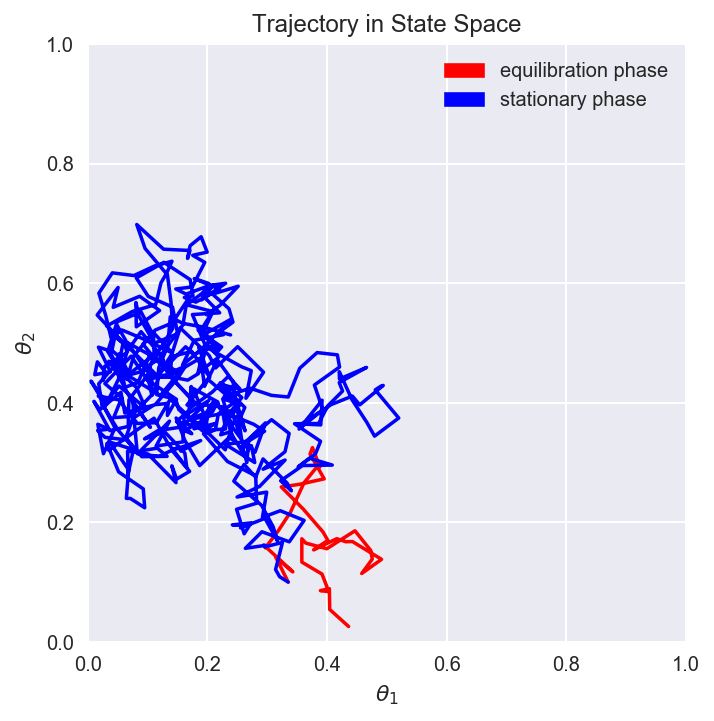

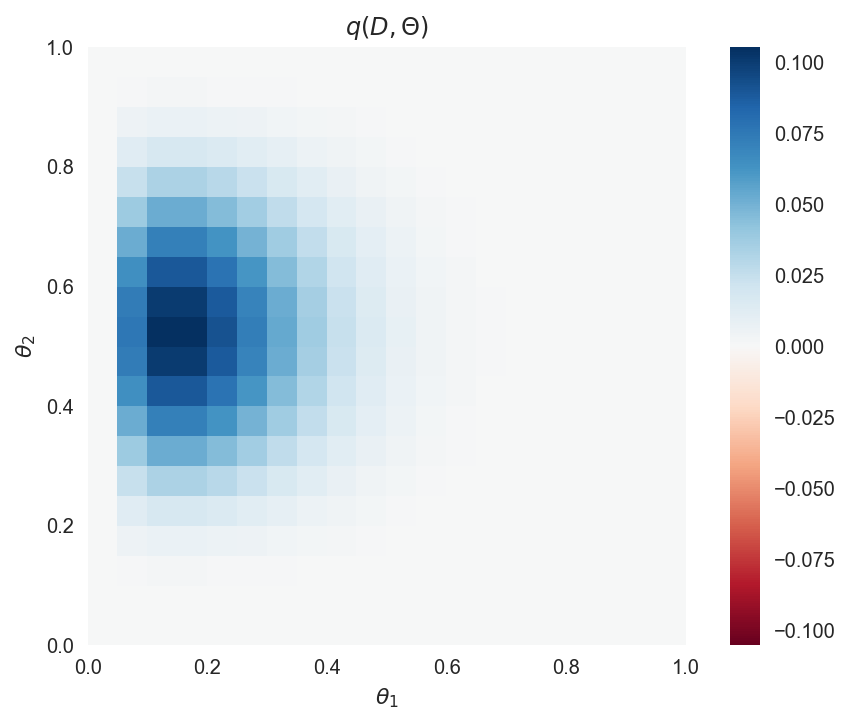

In [5]:
#not fully equilibrated:    
simulation(50,500,1,(1,4,8),2)

Average of Theta[0]:0.137233135536
Average of Theta[1]:0.436796975257


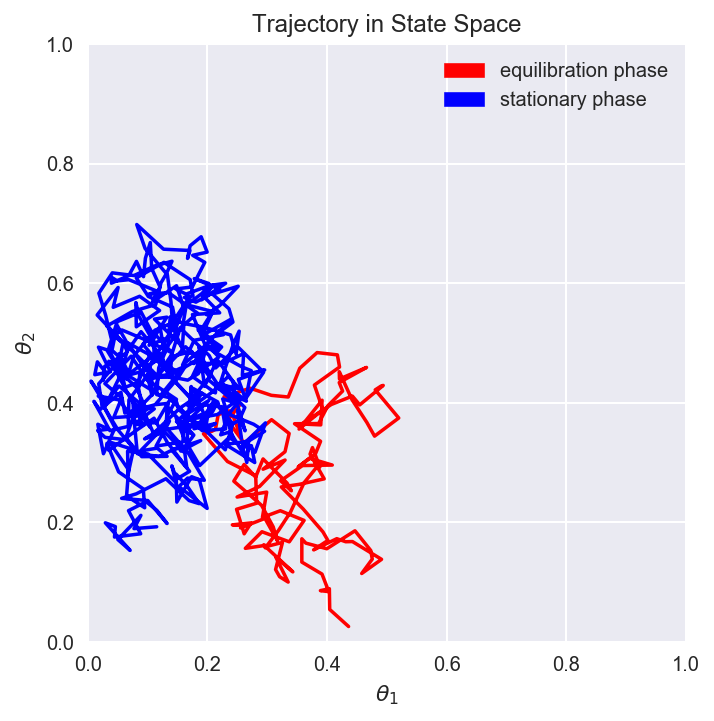

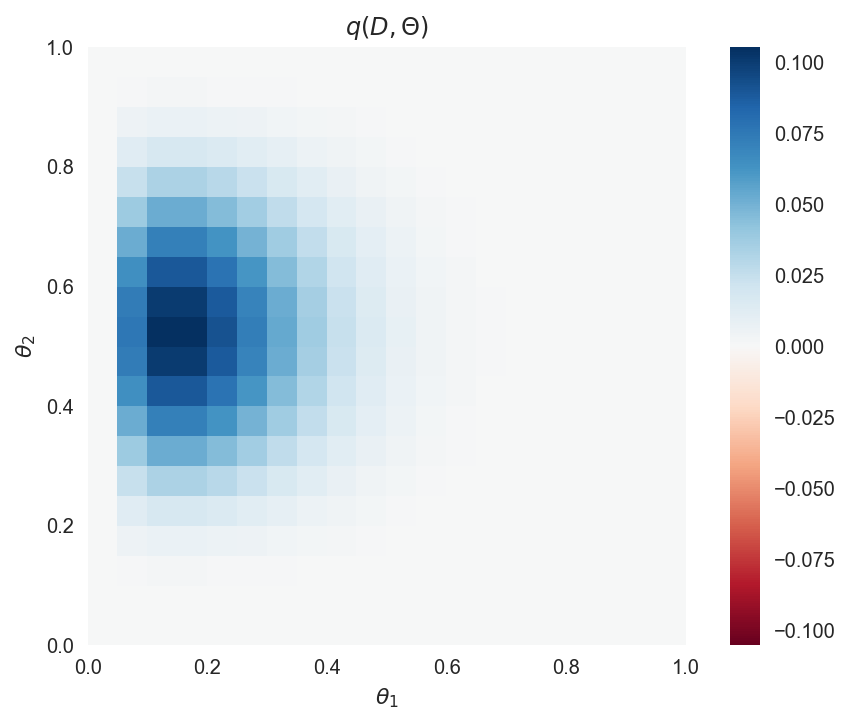

In [6]:
#better:    
simulation(150,500,1,(1,4,8),2)